imports

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

Integrator

In [117]:
def Integration(x0):
    Integ = scipy.integrate.ode(changeValues).set_integrator('lsoda').set_initial_value(x0, 0)
    Integ.set_f_params(PAR)
    return Integ

time Course

In [118]:
def timeCourse(t, x0):
    #x0 = INPUT_VALUES
    integrator = Integration(x0)
    array = [x0]
    cnt = 1

    while cnt < len(t):
        array.append(integrator.integrate(t[cnt]))
        cnt += 1

    return array

Parameter

In [119]:
'''

PAR = {'s': 1,  # externer Nährstoff
       'dm': 1,  # mRNA-Abbaurate
       'ns': 1,  # Nährstoffeffizienz
       'nr': 1,  # Ribosomenlänge
       'nx': 1,  # Länge nicht-ribosomaler Proteine
       'ymax': 1,  # max. übersetzen Dehnungsrate
       'Ky': 1,  # Übersetzung Verlängerungsschwelle
       'vt': 1,  # max. Nährstoffimportrate
       'Kt': 1,  # Nährstoffimportschwelle
       'vm': 1,  # max. enzymatische Rate
       'Km': 1,  # enzymatic threshold
       'wr': 1,  # max. Ribosomen-Transkriptionsrate
       'we': 1,  # max. Enzymtranskriptionsrate   we = wt = wm
       'wq': 1,  # max. q-Transkriptionsrate
       'thetar': 1,  # Ribosomentranskriptionsschwelle
       'thetanr': 1,  # Nicht-ribosomale Transkriptionsschwelle
       'Kq': 1,  # q-Autoinhibitionsschwelle
       'hq': 1,  # q-Autoinhibition Hill-Koeffizient
       'kb': 1,  # mRNA-Ribosomen-Bindungsrate
       'ku': 1,  # mRNA-Ribosomen-Nichtbindungsrate
       'M': 1,  # total cell mass
       'kcm': 1,  # Chloramphenicol-Bindungsrate
       'thetax': [1, 1, 1],  #transkriptionswelle #transcriptional energy-thresholds
       'wx': [1, 1, 1],  # wt,wm,wr,wq transkriptionsraten #maximal transcription rates
}

'''

PAR = { #'s': 10 ** 4,  # externer Nährstoff
         'kin': 0, # substrate supply rate
         'dn': 0,  # 1/min, culture dilution rate
         'dm': 0.1,  # mRNA-Abbaurate
         'ns': 0.5,  # Nährstoffeffizienz
         'nr': 7459,  # Ribosomenlänge
         'nx': 300,  # Länge nicht-ribosomaler Proteine
         'ymax': 1260,  # max. übersetzen Dehnungsrate
         'Ky': 7,  # Übersetzung Verlängerungsschwelle
         'vt': 726,  # max. Nährstoffimportrate
         'Kt': 1000,  # Nährstoffimportschwelle
         'vm': 5800,  # max. enzymatische Rate
         'Km': 1000,  # enzymatic threshold
         'wr': 930,  # max. Ribosomen-Transkriptionsrate
         'we': 4.14,  # max. Enzymtranskriptionsrate   we = wt = wm#
         'wq': 948.93,  # max. q-Transkriptionsrate
         'thetar': 426.87,  # Ribosomentranskriptionsschwelle
         'thetanr': 4.38,  # Nicht-ribosomale Transkriptionsschwelle
         'Kq': 152219,  # q-Autoinhibitionsschwelle
         'hq': 4,  # q-Autoinhibition Hill-Koeffizient
         'kb': 1,  # mRNA-Ribosomen-Bindungsrate
         'ku': 1,  # mRNA-Ribosomen-Nichtbindungsrate
         'M': 10 ** 8,  # total cell mass
         'kcm': 0.00599,  # Chloramphenicol-Bindungsrate
         'thetax': [4.38, 4.38, 426.87, 4.38],  #transkriptionswelle #transcriptional energy-thresholds
         'wx': [4.15, 4.15, 930, 948.93],  # wt,wm,wr,wq transkriptionsraten #maximal transcription rates
         'l': 1
 }



initial Values

In [120]:
#               si,    a,    r,    et,   em,  q,     mt,   mm,   mr,   mq,   ct,   cm,   cr,   cq, s, N
INPUT_VALUES = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
INPUT_VALUES_r = [0, 0,10**(-3), 10**(-3), 10**(-3), 10**(-3), 0, 0, 0, 0, 0, 0, 0, 0, 10 ** 4, 0.001]
#INPUT_VALUES_ = [31096.192, 43297.502, 0.0414, 471.364, 471.364, 471.364, 49.333, 49.333, 8514.558, 8811.960, 0, 0, 0, 0, 10 ** 4, 0.001] #ribosome-bound mRNA sequestered by chloramphenicol
INPUT_VALUES_w = [31096.192, 43297.502, 0.0414, 471.364, 471.364, 471.364, 49.333, 49.333, 8514.558, 8811.960, 0, 357.898, 348.675, 0, 10 ** 4, 0.001] # ribosome-bound mRNA


Funktionen

In [121]:
def vimp(et, s, par):
    return et * ((par['vt'] * s) / (par['Kt'] + s))

def vcat(em, si, par):
    return em * ((par['vm'] * si) / (par['Km'] + si))

In [122]:
# leitet die nettorate der Translation eines Proteins x ab
# 4x
def vx(a, cx, par):
    return cx * (gamma(a, par) / par['nx'])

def vr(a, par, cr):
    return cr * (gamma(a, par) / par['nx'])

def vq(a, cq, par):
    return cq * (gamma(a, par) / par['nx'])

# γ ist die Geschwindigkeit der Translationsdehnung mit maximaler Rate γ max = k 2 und Schwelle K γ = k 2 / K p für halbmaximale Dehnung.
def gamma(a, par):
    return (par['ymax'] * a) / (par['Ky'] + a)

In [123]:
# Wenn wir davon ausgehen, dass der Energieverbrauch in jedem Dehnungsschritt konstant ist, folgt daraus die effektive Transkriptionsrate
# 4x
def omegax(a, wx, thetaX):
    omegaResult = []
    for i in range(0, 3):
        omegaResult.append(wx[i] * (a / (thetaX[i] + a)))

    return omegaResult


def I(q, par):
    return 1/(1+((q/par['Kq'])**par['hq']))


def omegaq( a, par, q):
    return par['wq'] * (a / (par['thetanr'] + a)) * I(q, par)


In [124]:
# Die Wachstumsrate λ ist entscheidend, um die zellulären Prozesse mit Wachstum zu verbinden, da alle intrazellulären Spezies durch Umverteilung des Zellinhalts zwischen Mutter- und Tochterzellen verdünnt werden
def lamda(a, par, cValues):
    return (gamma(a, par) / par['M']) * sum(cValues)


In [125]:
#die Gesamtmasse der Zelle als Gesamtproteinmasse (einschließlich gebundener Ribosomen)
#def M(par):
   # return(sum(par['nx']*x)+pa['nr']*sum(cx))

#def M(cValue, par):  # die Gesamtmasse der Zelle als Gesamtproteinmasse (einschließlich gebundener Ribosomen)
     #return (sum(par['nx'] * x) + par['nr'] * sum(cValue))

def M(cValues, r, et, q, em, par):
    return par['nr'] * sum(cValues) + par['nr'] * r + par['nx'] * et + par['nx'] * q + par['nx'] * em

def nr_r(cValues, et, q, em, par):
    return - (par['nr']*sum(cValues) + par['nx'] * et + par['nx'] * q + par['nx'] * em + par['M'])


Differentialgleichungen

In [126]:
# Differentialgleichung für den inneren Nährstoff
# 1x
def dsi_dt(si, s, par, et, em, lamdaResult):
    return vimp(et, s, par) - vcat(em, si, par) - lamdaResult * si


# Gleichung für die zellulare Energie
# 1x
def da_dt(a, em, cx, si, par, lamdaResult):
    sum_all_protein_in_cell = []
    for i in range(0, 4):
        sum_all_protein_in_cell.append(par['nx'] * (vx(a, cx[i], par)))
    return par['ns'] * vcat(em, si, par) - sum(sum_all_protein_in_cell) - lamdaResult * a


# Gleichung für freie Ribosomen  für vr und cr
# 1x
def dr_dt(a, cx, mx, r, par, lamdaResult, cr):
    sum_proteins_ribosomes = []
    for i in range(0, 4):
        sum_proteins_ribosomes.append(vx(a, cx[i], par) - par['kb'] * r * mx + par['ku'] * cx[i])
    return vr(a, par, cr) - lamdaResult * r + sum(sum_proteins_ribosomes)


# intrazelluläre Ribosomen Sei r die Anzahl der freien Ribosomen. Bezeichne k b und k u die Bindungs- und Unbindungsraten eines Ribosoms an mRNA (für alle mRNAs als identisch angenommen) und lasse die mRNA für ein Protein x dann m x sein
# 4x
def dmx_dt(a, cx, mx, r, par, lamdaResult, omegaResult):
    return omegaResult - (lamdaResult + par['dm']) * mx + vx(a, cx, par) - par['kb'] * r * mx + par['ku'] * cx


def dmq_dt(a, cx, mq, r, par, lamdaResult, q, cq):
    return omegaq( a, par, q) - (lamdaResult + par['dm']) * mq + vq(a, cq, par) - par['kb'] * r * mq + par['ku'] * cq


# Mit cx wird der Komplex zwischen einem Ribosom bezeichnet und die mRNA für Protein x
# 4x
def dcxt_dt(a, cx, mx, r, par, lamdaResult):
    return ((-lamdaResult * cx)) + par['kb'] * r * mx - par['ku'] * cx - vx(a, cx, par)


# Transporterenzyme für vt und ct
# Enzym,das si in a umwandelt (metabolische Enzyme)
# house-keeping Proteine
# 1x
def det_dt(a, ct, et, par, lamdaResult):
    return vx(a, ct, par) - lamdaResult * et




def dn_dt(lamdaResult, N, par):
    return lamdaResult * N - par['dn'] * N

def ds_dt(par, et, s, N):
    return par['kin'] - vimp(et, s, par) * N - par['dn'] * s


changeValues Funktion für Integrator

In [127]:
def changeValues(time, i, par):
    si = i[0]
    a = i[1]
    #r = i[2]
    #r = par['M']/par['nr']
    et = i[3]
    em = i[4]
    q = i[5]
    mt = i[6]
    mm = i[7]
    mr = i[8]
    mq = i[9]
    ct = i[10]
    cm = i[11]
    cr = i[12]
    cq = i[13]
    s = i[14]
    N = i[15]
    cx = [ct, cm, cr, cq]
    r = nr_r(cx, et, q, em, par)

    omegaResult = omegax(a, par["wx"], par["thetax"])
    lamdaResult = lamda(a, par, cx)
    #lamdaResult = par['l']
    
    detResult = det_dt(a, ct, et, par, lamdaResult)
    demResult = det_dt(a, cm, em, par, lamdaResult)
    dqResult = det_dt(a, cq, q, par, lamdaResult)
    dsiResult = dsi_dt(si, s, par, et, em, lamdaResult)
    daResult = da_dt(a, em, cx, si, par, lamdaResult) 
    #drResult = nr_r(cx, et, q, em, par)
    drResult = dr_dt(a, cx, mt, r, par, lamdaResult, cr)
    dmtResult = dmx_dt(a, ct, mt, r, par, lamdaResult, omegaResult[0])
    dmmResult = dmx_dt(a, cm, mm, r, par, lamdaResult, omegaResult[1])
    dmrResult = dmx_dt(a, cr, mr, r, par, lamdaResult, omegaResult[2])
    dmqResult = dmq_dt(a, cx, mq, r, par, lamdaResult, q, cq)
    dctResult = dcxt_dt(a, ct, mt, r,  par, lamdaResult)
    dcmResult = dcxt_dt(a, cm, mm, r,  par, lamdaResult)
    dcrResult = dcxt_dt(a, cr, mr, r,  par, lamdaResult)
    dcqResult = dcxt_dt(a, cq, mq, r,  par, lamdaResult)
    dsResult = ds_dt(par, et, s, N)
    dnResult = dn_dt(lamdaResult, N, par)

    return [
        dsiResult,
        daResult,
        drResult,
        detResult,
        demResult,
        dqResult,
        dmtResult,
        dmmResult,
        dmrResult,
        dmqResult,
        dcmResult,
        dcrResult,
        dctResult,
        dcqResult,
        dsResult,
        dnResult
        ]

Übersicht über Funktion

In [128]:
t = np.linspace(0, 100, 10)
INPUT_VALUESdsi_dt = np.array(changeValues(t, INPUT_VALUES, PAR))
#print("INPUT DSI: ", INPUT_VALUESdsi_dt)
print("LEN INPUT DSI: " , len(INPUT_VALUESdsi_dt))

LEN INPUT DSI:  16


Plots

In [129]:
results = timeCourse(t, INPUT_VALUES)
result_r = timeCourse(t, INPUT_VALUES_r)
result_w = timeCourse(t, INPUT_VALUES_w)
names = ['si', 'a', 'r', 'et', 'em', 'q', 'mt', 'mm', 'mr', 'mq', 'ct', 'cm', 'cr', 'cq', 's', 'N']

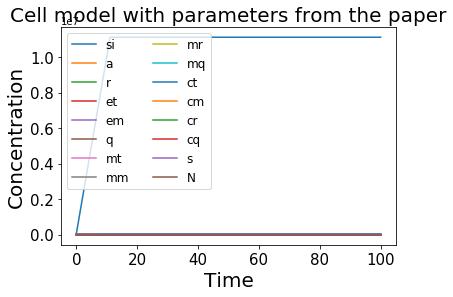

In [130]:
plt.title('Cell model with parameters from the paper', size = 20)
plt.xlabel('Time', size = 20)
plt.ylabel('Concentration', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
lines = plt.plot(t, result_w)
plt.legend(lines[:16], names, prop = {'size': 12}, loc = 'upper left', frameon=True, ncol=2)
plt.show()

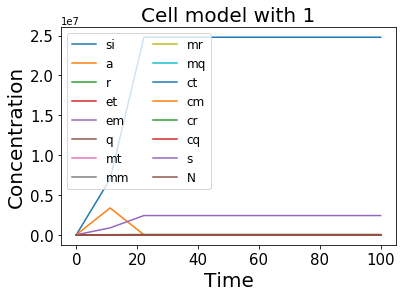

In [131]:
plt.title('Cell model with 1', size = 20)
plt.xlabel('Time', size = 20)
plt.ylabel('Concentration', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
lines = plt.plot(t, results)
plt.legend(lines[:16], names, prop = {'size': 12}, loc = 'upper left', frameon=True, ncol=2)
plt.show()

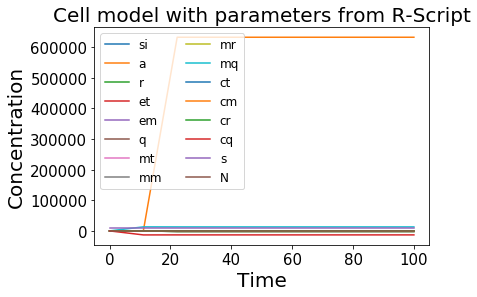

In [132]:
plt.title('Cell model with parameters from R-Script', size = 20)
plt.xlabel('Time', size = 20)
plt.ylabel('Concentration', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
lines = plt.plot(t, result_r)
plt.legend(lines[:16], names, prop = {'size': 12}, loc = 'upper left', frameon=True, ncol=2)
plt.show()

Fehlersuche

In [133]:

#t = np.linspace(0, 100, 30)
#print(type(t))
#for i in timeCourse(t,INPUT_VALUES):
#    for j in i :
#        if j <0:
#            print(j,i)
#            break


Funktion überprüfen

In [134]:
changeValuesProbe = changeValues(np.linspace(0, 100, 1000),np.zeros(16),PAR)
print(changeValuesProbe)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0]


In [135]:
timeCourseProbe = timeCourse(np.linspace(0, 10, 10),np.zeros(16))
timeCourseProbe

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]